# 1. Probability and counting

## Sample spaces and Pebble World

### Sample space and event

The *sample space* $S$ of an experiment is the set of all possible outcomes of the experiment. An *event* $A$ is a subset of the sample space $S$, and we say that $A$ *occurred* if the actual outcome is in $A$.

### Naive definition of probability

Let $A$ be an event for an experiment with a finite sample space $S$. The *naive probability* of $A$ is

\begin{equation}
P_{naive}(A) = \frac{|A|} {|S|} = \frac{number\ of\ outcomes\ favorable\ to\ A} {total\ number\ of\ outcomes\ in\ S} 
\end{equation}

### General definition of probability

A *probability space* consists of a sample space $S$ and a *probability function* $P$ which takes an event $A \subseteq S$ as input and returns $P(A)$, a real number between 0 and 1, as output. The function $P$ must satisfy the following axioms:

1. $P(\phi) = 0$, $P(S) = 1$
2. If $A_1$, $A_2$, $...$ are disjoint events, then 

\begin{equation}
P(\bigcup_{j=1}^{\infty} A_j) = \sum_{j=1}^{\infty} P(A_j)
\end{equation}

### Properties of probability

Probability has the following properties, for any events $A$ and $B$.

1. $P(A^c) = 1 - P(A)$
2. If $A \subseteq B$, then $P(A) \leq P(B)$
3. $P(A \cup B) = P(A) + P(B) - P(A \cap B)$


## Python examples

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial
from scipy.special import binom
from numpy.random import choice
from numpy.random import permutation

%matplotlib inline
%load_ext autoreload
%autoreload 2

### Vectors

In [2]:
# Vector definition
v = np.array([3, 1, 4, 1, 5, 9])

# Vector operations
print(np.sum(v))   # v.sum()
print(np.min(v))   # v.min()
print(np.shape(v))   # v.shape

23
1
(6,)


In [3]:
# Accessing the entries of a vector
print(v[2])
print(v[[1, 3, 5]])

4
[1 1 9]


### Factorials and binomial coefficients

In [4]:
n, k = 5, 3
print(factorial(n))    # factorial(n)
print(binom(n, k))    # binom(n, k)

120.0
10.0


### Sampling and simulation

In [5]:
n, k = 10, 5
population = np.arange(n)    # [0, 1, 2, ..., n-1]
print(choice(population, size=k, replace=False))   # choice(vector, k)  without replacement
print(choice(population, size=k, replace=True))    # choice(vector, k) with replacement
print(permutation(n))    # random permutation

[0 2 6 7 9]
[7 4 5 3 7]
[0 3 1 8 7 9 5 4 6 2]


In [6]:
population = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P',
                      'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
k = 7
print(choice(population, size=k, replace=False))

['U' 'O' 'R' 'A' 'V' 'Z' 'F']


In [7]:
n, k = 4, 3
population = np.arange(n)
print(choice(population, size=k, replace=True, p=[0.1, 0.2, 0.3, 0.4]))   # Sampling with given probabilities

[3 0 3]


### Matching problem simulation

Consider a well-shuffled deck of $n$ cards, labeled 1 through $n$. You flip over the cards one by one, saying the numbers 1 through $n$ as you do so. You win the game if, at some point, the number you say aloud is the same as the number on the card being flipped over (for example, if the 7th card in the deck has the label 7). What is the probability of winning?

(answer)
\begin{equation}
\lim_{n \to \infty} P({winning}) = 1 - \frac{1} {e} = 0.63
\end{equation}

In [8]:
n = 100   # number of cards
num_trials = 10**4   # number of trials
results = []
for i in range(num_trials):
    results.append(np.sum(permutation(n) == np.arange(n)))   # shuffle; count matches
results = np.array(results, dtype=int)
print(np.sum(results >= 1) / float(num_trials))   # proportion with a match

0.6342


### Birthday problem calculation and simulation

There are $k$ people in a room. Assume each person's birthday is equally likely to be any of the 365 days of the year (we exclude February 29), and that people's birthdays are independent (we assume there are no twins in the room). What is the probability that two or more people in the group have the same birthday?

(answer) 
\begin{equation}
P(no\ birthday\ match) = \frac{365\cdot364\cdot{...}\cdot(365-k+1)} {365^k}
\end{equation}

\begin{equation}
P(at\ least\ 1\ birthday\ match) = 1 - \frac{365\cdot364\cdot{...}\cdot(365-k+1)} {365^k}
\end{equation}

0.507297234324


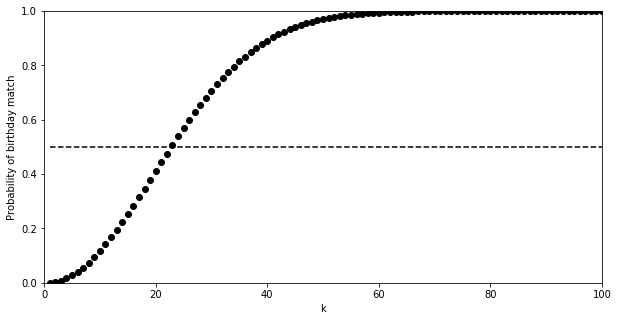

In [9]:
k_max = 100
k_np = np.arange(start=1, stop=k_max+1)   # [1, ..., 100]

probs = []
for k in k_np:
    mult = 1.0
    for j in range(365-k+1, 366):
        mult *= j / 365.
    p = 1 - mult
    probs.append(p)
    
fig = plt.figure(figsize=(10, 5))
plt.plot(k_np, np.array(probs), 'ko')
plt.plot(k_np, len(k_np)*[0.5], 'k--')
plt.xlabel('k')
plt.ylabel('Probability of birthday match')
plt.xlim([0, 100])
plt.ylim([0, 1])

print(probs[22])

In [10]:
# Birthday problem simulation
n, k = 365, 23
population = np.arange(n)
num_trials = 10**4  # number of trials
results = []
for i in range(num_trials):
    sample = choice(population, size=k, replace=True)
    unique, counts = np.unique(sample, return_counts=True)   # get unique days and their matching counts
    results.append(np.max(counts))
results = np.array(results, dtype=int)
print(np.sum(results >= 2) / float(num_trials))

0.5066
